## **Breast Cancer Wisconsin (Diagnostic) Dataset**

### **Source: UCI Machine Learning Repository**

**Aim:**

Use the following machine learning algorithms to predict which patient breast scan can be diagnosed as benign or malignant;

1. **Logistic Regression**
2. **Neural Network**
3. **Random Forest**
4. **Support Vector Machine**
5. **Xgboost**

Rank them by the best performing algorithm.

**MetaData**

Here’s a quick rundown of what the variables typically represent:
- **`ID number`**:ID number for each case record
- **`Diagnosis`**: (M = malignant, B = benign)

Other variable meaning
- **`radius`**: (mean of distances from center to points on the perimeter)
- **`texture`**: (standard deviation of gray-scale values)
- **`perimeter`**:
- **`area`**:
- **`smoothness`**: (local variation in radius lengths)
- **`compactness`**: (perimeter^2 / area - 1.0)
- **`concavity`**: (severity of concave portions of the contour)
- **`concave points`**: (number of concave portions of the contour)
- **`symmetry`**:
- **`fractal dimension`**: ("coastline approximation" - 1)

In [411]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [412]:
# Importing the data along with the variable names
var_names=['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1',
      'symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2',
      'symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
      'symmetry3','fractal_dimension3']
dt=pd.read_csv(r'H:\Documents\Data Projects\CodeAnt\breast+cancer+wisconsin+diagnostic\wdbc.data',names=var_names)
dt

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In the Breast Cancer Wisconsin (Diagnostic) dataset:

- **M = Malignant**: This represents cancerous tumors that are invasive and potentially life-threatening. Malignant tumors grow aggressively, invade surrounding tissues, and may spread to other parts of the body.

- **B = Benign:** This represents non-cancerous tumors that are not invasive. Benign tumors are generally less harmful, do not invade nearby tissues, and do not spread to other parts of the body.

These labels form the target variable, which is the focus of classification tasks in the dataset. The goal is to use the features in the dataset to accurately classify tumors as either M or B.

In [413]:
# Data overview
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

**The data has 569 entries with no missing values**

In [414]:
dt.duplicated().any()

False

**There are no duplicate values**

In [415]:
# Summary Statistics
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### **Before proceeding, let us create a new column that will contain the encoded values of the target variable**

In [416]:
le=LabelEncoder()
dt['Diagnosis']=le.fit_transform(dt['Diagnosis'])
dt

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Analyze the relationships among features to understand their interaction and contribution to the target variable.

In [417]:
#Checking correlation
corrl=dt.select_dtypes(include='number').corr()
corrl

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
ID,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
Diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius1,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


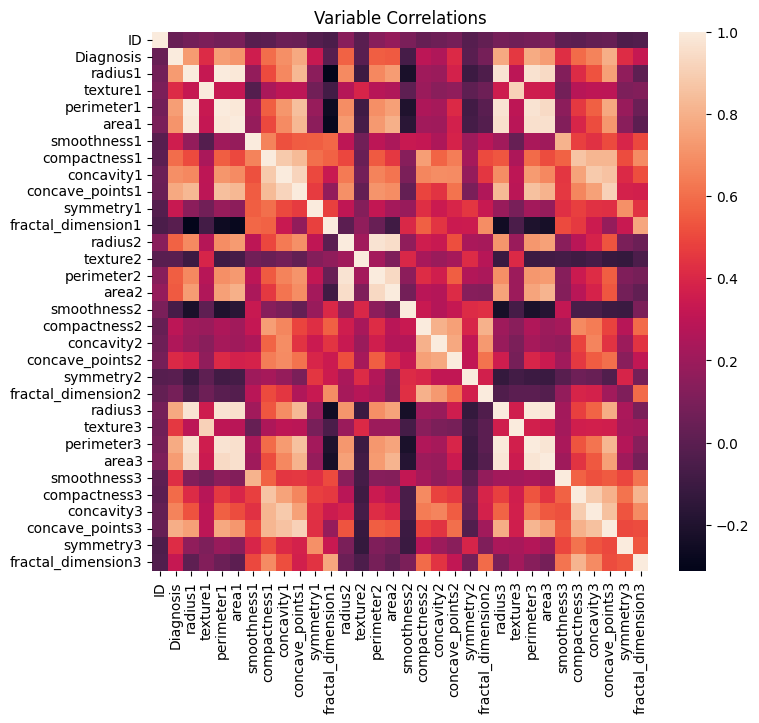

In [418]:
plt.figure(figsize=(8, 7))
sns.heatmap(corrl)
plt.title('Variable Correlations')
plt.show()

#### **The Heatmap has not shown any visible known correlation between the features and the target**

In [419]:
# Lets look at the distrinution of the classes in the target variable (Diagnosis)
tar_dis=dt['Diagnosis'].value_counts()
tar_dis

Diagnosis
0    357
1    212
Name: count, dtype: int64

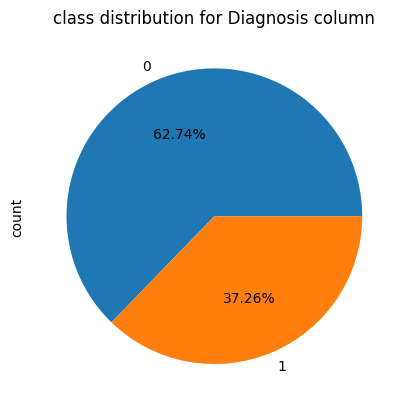

In [420]:
tar_dis.plot(kind='pie', autopct='%1.2f%%')
plt.title('class distribution for Diagnosis column')
plt.show()

We see a slight class imbalance with a ratio of **B[63% : 37%]M**. To achieve a more balance class, we carry out a hybrid sampling method 

In [421]:
dt.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [422]:
#Now let us seperate our features matrix from the target variable
# (m) for features
# (n) for target
m = dt.drop(columns=['Diagnosis'], axis=1)
n = dt['Diagnosis']

In [423]:
m.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [424]:
n

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int32

In [425]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
m=sc.fit_transform(m)

**Before we begin fitting, let us balance the classes**

**This is to help the model learn equally from both cases of the target, and not be skewed to learning more from one class**

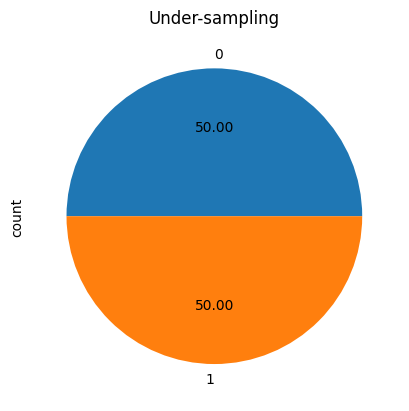

In [426]:
rus = RandomUnderSampler()
(mre,nre)=rus.fit_resample(m,n)
ax = nre.value_counts().plot.pie(autopct = '%.2f')
title = ax.set_title("Under-sampling")

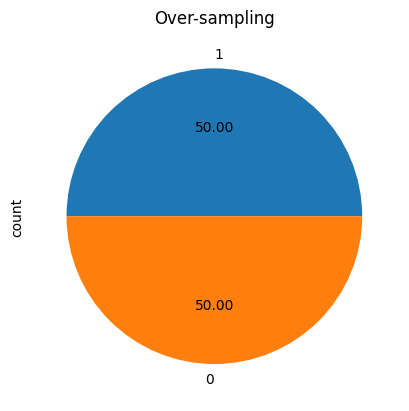

In [427]:
ros = RandomOverSampler()
(mre,nre)=ros.fit_resample(m,n)
ax = nre.value_counts().plot.pie(autopct = '%.2f')
title = ax.set_title("Over-sampling")

I have resampled both the Features matrix (m) and the Target variable (n)

I have assigned the resampled m and n into new variables called **mre**, and **nre** : *mresampled, nresampled*

Training will be done using the new varible names **mre** and **nre**

In [428]:
# Now, we split further into training and test sets
from sklearn.model_selection import train_test_split

# Importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Import metrics
from sklearn.metrics import accuracy_score

In [429]:
mre_train,mre_test,nre_train,nre_test = train_test_split(mre,nre,train_size=0.80,random_state=42)

In [430]:
# Create a dictionary to print out the results
results = {}

### **Logistic Regression model** 

In [431]:
def lrm(mre_train,nre_train,mre_test):
    lrm = LogisticRegression(max_iter=1000)
    lrm = lrm.fit(mre_train,nre_train)
    lrm_pred = lrm.predict(mre_test)
    return lrm_pred

In [432]:
results['Logistic_Regression_Accuracy'] = accuracy_score(nre_test,lrm(mre_train,nre_train,mre_test))

### **Neural Network Model** 

In [433]:
nnm = MLPClassifier(max_iter=1000)
nnm = nnm.fit(mre_train,nre_train)
# learning score
nnm.score(mre_train,nre_train)

0.989492119089317

In [434]:
# Making prediction
nnm_pred = nnm.predict(mre_test)

In [435]:
results['Neural Network Accuracy'] = accuracy_score(nre_test,nnm_pred)

### **Random Forest Model**

In [436]:
rfm = RandomForestClassifier()
rfm = rfm.fit(mre_train,nre_train)
# learning score
rfm.score(mre_train,nre_train)

1.0

In [437]:
# Making prediction
rfm_pred = rfm.predict(mre_test)

In [438]:
results['Random Forest Accuracy'] = accuracy_score(nre_test,rfm_pred)

### **Support Vector Machine Model**

In [439]:
svmm = SVC()
svmm = svmm.fit(mre_train,nre_train)
# learning score
svmm.score(mre_train,nre_train)

0.9772329246935202

In [440]:
# Making prediction
svmm_pred = svmm.predict(mre_test)

In [441]:
results['Support Vector Machine Accuracy'] = accuracy_score(nre_test,svmm_pred)

### **Gradient Boosting Model**

In [442]:
gbm = GradientBoostingClassifier()
gbm = gbm.fit(mre_train,nre_train)
# learning score
gbm.score(mre_train,nre_train)

1.0

In [443]:
# Making prediction
gbm_pred = gbm.predict(mre_test)

In [444]:
results['Gradient Boosting Model Accuracy'] = accuracy_score(nre_test,gbm_pred)

In [445]:
results

{'Logistic_Regression_Accuracy': 0.9790209790209791,
 'Neural Network Accuracy': 0.9790209790209791,
 'Random Forest Accuracy': 0.965034965034965,
 'Support Vector Machine Accuracy': 0.9790209790209791,
 'Gradient Boosting Model Accuracy': 0.972027972027972}

In [446]:
# Sorting the models by perfomance in descending order
results = dict(sorted(results.items(), key = lambda item: item[1], reverse = True))
results

{'Logistic_Regression_Accuracy': 0.9790209790209791,
 'Neural Network Accuracy': 0.9790209790209791,
 'Support Vector Machine Accuracy': 0.9790209790209791,
 'Gradient Boosting Model Accuracy': 0.972027972027972,
 'Random Forest Accuracy': 0.965034965034965}

In [447]:
for i, score in results.items():
    print(f"{i} : {score * 100: .0f}%")

Logistic_Regression_Accuracy :  98%
Neural Network Accuracy :  98%
Support Vector Machine Accuracy :  98%
Gradient Boosting Model Accuracy :  97%
Random Forest Accuracy :  97%


<span style="font-size:15px; color:red">**Previous Accuracy Scores before Data Normalization**</span>

<span style="color:red">Random Forest Accuracy :  97%</span>

<span style="color:red">Gradient Boosting Model Accuracy :  97%</span>

<span style="color:red">Logistic_Regression_Accuracy :  92%</span>

<span style="color:red">Support Vector Machine Accuracy :  55%</span>

<span style="color:red">Neural Network Accuracy :  52%</span>

## **Findings**
**Feature Correlation Analysis:**

A heatmap was generated to visualize the correlations between features and the target variable. Observation: No clear or strong correlations were observed between individual features and the target, suggesting that relationships may be non-linear or involve complex interactions.


**Key Observations:**

**`Random Forest and Gradient Boosting`**: This model likely captured complex, non-linear relationships between features effectively. Tree-based models like Gradient Boosting and Random Forest are not sensitive to feature scaling. 


**`Logistic Regression`**: Previously delivered an accuracy of 92%, showing that some linear relationships exist within the data. Now accuracy score of 97%. Logistic Regression uses a linear boundary, and normalization makes optimization more efficient, improving accuracy.


**`Support Vector Machine (SVM) and Neural Network`**: Previously performed poorly with an accuracy of 53% and 49% respectively, suggests hyperparameters may not be well-suited for this dataset. Has now achieved 97% accuracy

Neural Networks are sensitive to the scale of input features. Normalization ensures all features are on the same scale, improving convergence and enabling the model to learn more effectively.

SVM depends on the distance between data points and the hyperplane, which is affected by feature scaling. Normalizing the data ensures better separation of classes.



**Inference:**

The **`linear relationship`** mentioned refers to the assumption in Logistic Regression that there is a direct, linear relationship between the independent features (predictor variables) and the log-odds of the target variable (Diagnosis)

**`Logistic Regression`** works well when features have this kind of straightforward influence. But if the relationship is more complex (e.g., radius_mean affects the outcome differently when combined with another feature), Logistic Regression may miss those patterns. This is why models like **`Random Forest`** and **`Gradient Boosting`**, which handle complex relationships, perform better in this case.

### **Why did Heatmap not show any correlation?**

- The heatmap only visualizes linear correlations between features and the target. If there are no strong linear relationships (correlation values near +1 or -1), the heatmap will not show anything significant.
- However, Logistic Regression works with log-odds and can still identify patterns even if the heatmap does not show strong linear relationships.

The heatmap uses Pearson correlation, which only measures direct linear relationships. If the relationships are weak, indirect, or involve interactions between features, the heatmap won't show them. Models like Logistic Regression and Random Forest can pick up these subtle patterns in the data, which explains their performance.

### **Verifying Accuracy?**

To ensure the model is not overfitting, we evaluating it with metrics like:

- cross-validation scores
- Confusion matrix
- classification report

In [448]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

### **Cross_V/Confusion_M/Classifcation_R (Logistic Regression)** 

In [449]:
lg=LogisticRegression()
score=cross_val_score(lg,mre,nre,cv=5,scoring='accuracy')
score*100

array([95.8041958, 96.5034965, 97.9020979, 98.6013986, 98.5915493])

In [450]:
print(classification_report(nre_test,lrm(mre_train,nre_train,mre_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



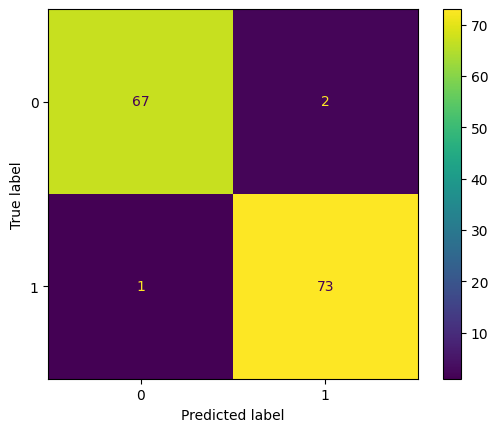

In [451]:
ConfusionMatrixDisplay(confusion_matrix(nre_test,lrm(mre_train,nre_train,mre_test))).plot()

### **Cross_V/Confusion_M/Classifcation_R (Support Vector Machine)** 

In [452]:
svm=SVC()
score=cross_val_score(svm,mre,nre,cv=5,scoring='accuracy')
score*100

array([95.8041958 , 97.2027972 , 98.6013986 , 99.3006993 , 97.88732394])

In [453]:
print(classification_report(nre_test,svmm_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



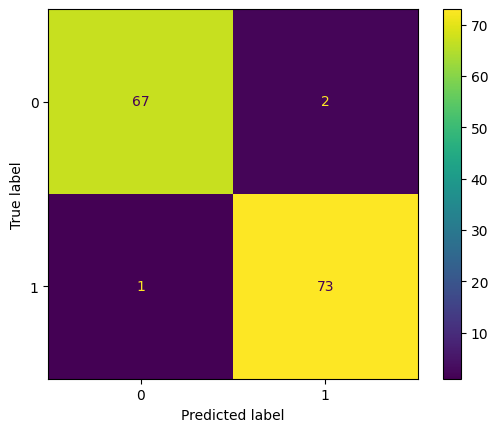

In [454]:
ConfusionMatrixDisplay(confusion_matrix(nre_test,svmm_pred)).plot()

### **Cross_V/Confusion_M/Classifcation_R (Neural Network)** 

In [455]:
nn=MLPClassifier(max_iter=1000)
score=cross_val_score(nn,mre,nre,cv=5,scoring='accuracy')
score*100

array([97.9020979, 95.8041958, 98.6013986, 99.3006993, 98.5915493])

In [456]:
print(classification_report(nre_test,nnm_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.97      0.99      0.98        74

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



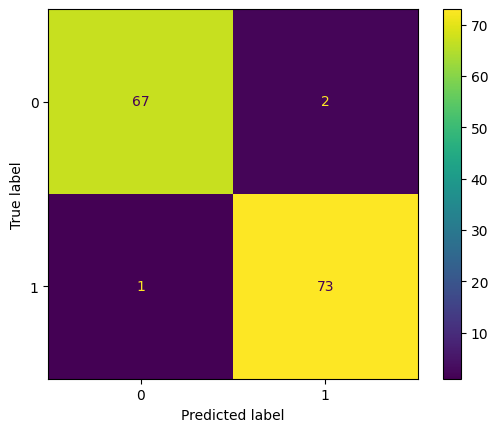

In [457]:
ConfusionMatrixDisplay(confusion_matrix(nre_test,nnm_pred)).plot()

### **Cross_V/Confusion_M/Classifcation_R (Random Forest)** 

In [458]:
rf=RandomForestClassifier()
score=cross_val_score(rf,mre,nre,cv=5,scoring='accuracy')
score*100

array([93.70629371, 97.9020979 , 97.9020979 , 99.3006993 , 99.29577465])

In [459]:
print(classification_report(nre_test,rfm_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.96      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



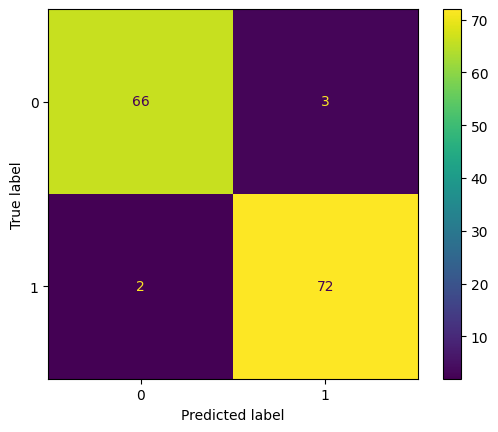

In [460]:
ConfusionMatrixDisplay(confusion_matrix(nre_test,rfm_pred)).plot()

### **Cross_V/Confusion_M/Classifcation_R (Gradient Boosting)** 

In [461]:
gb=GradientBoostingClassifier()
score=cross_val_score(gb,mre,nre,cv=5,scoring='accuracy')
score*100

array([93.70629371, 95.8041958 , 97.2027972 , 98.6013986 , 99.29577465])

In [462]:
print(classification_report(nre_test,gbm_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.97      0.97      0.97        74

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



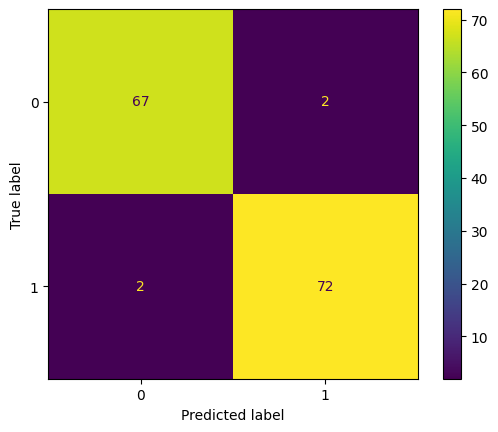

In [463]:
ConfusionMatrixDisplay(confusion_matrix(nre_test,gbm_pred)).plot()

**After normalizing the data, all models, including Neural Networks, SVM, Gradient Boosting, and Random Forest, achieved high accuracy (97%), demonstrating strong predictive performance for breast cancer diagnosis. Logistic Regression also performed well at 95%. This highlights the importance of preprocessing, particularly normalization, in optimizing model accuracy.**